<a href="https://colab.research.google.com/github/asim5800/azure/blob/main/Lendenclub_borrower_APP_REVIEWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Top apps for our rivalry

1 12 club (com.twelve.club)

2 Lendenclub investment (com.innofinsolutions.lendenclub.lender)

3 Lendenclub borrower (com.innofinsolutions.instamoney)

4 Faircent (com.app.faircent)

5 Lendbox(in.lendbox.app)

6 Rupeecircle(com.fintelligence.rupeecircle)

7 i2i funding (com.i2ifunding_investorapp)

8 i2i borrower (com.i2iborrower)
 

In [ ]:
# Define and configure Google Play Scraper library
phonepe_users_reviews = reviews_all(
    'com.innofinsolutions.instamoney',
    sleep_milliseconds=0,
    #lang='chi', # Default language is 'en', set language to Chinese.
    #country='hk', # Default country is 'us', set country to Hong Kong.
    count=5000, # defaults to 100
    sort=Sort.MOST_RELEVANT, # Default is Sort.MOST_RELEVANT.
)

In [ ]:
# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(phonepe_users_reviews),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').tolist()))
# Display dataframe header
df_reviews.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,cb05e6e6-eb7c-4c8c-8206-9dba2e26b50b,Taranjit Kaur,https://play-lh.googleusercontent.com/a/AGNmyx...,I really like how intuitive and easy to use th...,5,1,5.2.3,2023-05-03 03:37:21,"Dear Taranjit, we are happy to know that you f...",2023-05-03 11:23:25,5.2.3
1,54a433ed-2f16-486e-b3c4-c76159894edd,Iknoor Kaur,https://play-lh.googleusercontent.com/a-/ACB-R...,"The application was straightforward, and I did...",5,1,5.2.3,2023-05-02 16:55:25,We would like to thank you for using our onlin...,2023-05-03 11:20:38,5.2.3
2,a8d7e3b9-66e6-4c63-bab7-d0d6b934c021,Alok Kumar,https://play-lh.googleusercontent.com/a-/ACB-R...,In assisted me in acquiring a loan in a timely...,5,9,5.2.1,2023-05-01 18:06:55,We are pleased that you enjoyed the app. If th...,2023-05-02 05:17:05,5.2.1
3,7d3f8528-2ce3-4443-a30b-57c2217c6e5f,Deepak Kumar,https://play-lh.googleusercontent.com/a/AGNmyx...,Getting a loan never felt so easy and smooth!!...,5,0,5.2.3,2023-05-02 17:01:33,"Hi,\nThanks for your feedback. We are continuo...",2023-05-03 11:20:48,5.2.3
4,e7c5cad8-6115-4b56-b860-0fbb747ae51d,dushyanth prince,https://play-lh.googleusercontent.com/a/AGNmyx...,Not satisfied with the service they offered. H...,1,23,5.2.1,2023-05-01 06:45:07,"Hi, We regret to inform you, your loan applica...",2022-04-27 11:06:20,5.2.1


In [ ]:
# Check dataframe informationpl
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              51717 non-null  object        
 1   userName              51717 non-null  object        
 2   userImage             51717 non-null  object        
 3   content               51717 non-null  object        
 4   score                 51717 non-null  int64         
 5   thumbsUpCount         51717 non-null  int64         
 6   reviewCreatedVersion  34755 non-null  object        
 7   at                    51717 non-null  datetime64[ns]
 8   replyContent          51268 non-null  object        
 9   repliedAt             51268 non-null  datetime64[ns]
 10  appVersion            34755 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 4.3+ MB


In [ ]:
#df_reviews.to_csv('12club_review.csv')

In [ ]:
df_reviews=df_reviews.sample(frac=0.17)

In [ ]:
# Count number of review scores
df_reviews['score'].value_counts()

5    4859
1    3314
4     353
2     150
3     116
Name: score, dtype: int64

<Axes: ylabel='score'>

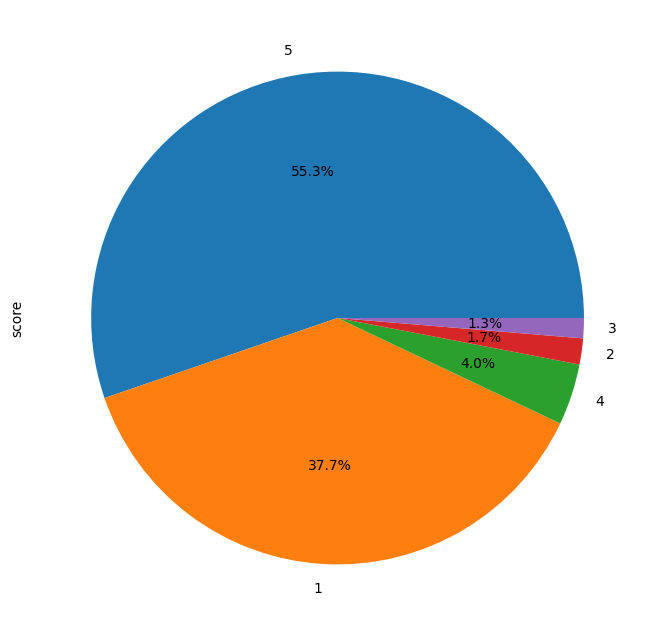

In [ ]:
# Visualize review scores as pie chart  
df_reviews['score'].value_counts().plot(kind='pie',figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Create new dataframe with review content and score for further analysis
df_reviews_content = pd.DataFrame(df_reviews, columns=['content','score'])

In [ ]:
# Display new dataframe header
df_reviews_content.head()

,content,score
31992,Waste of time,1
15939,It's fakes app 199 pay but not approves loan,1
9986,Very bad experience from lendenclub ...my loan...,1
1435,"Kudos team instamoney for such an ideal work ,...",5
47785,I am pancard already registered pls help,5


Install azure text analytics API

In [ ]:
pip install azure-ai-textanalytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import necessary libraries
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [ ]:
# Define the service key and endpoint of Azure Text Analytics
key = "4f40f49470f34ce2b1758902d75c182c"
endpoint = "https://mycognitiveserviceresource12345.cognitiveservices.azure.com/"

In [ ]:
# Configure Azure Text Analytics client library
ta_credential = AzureKeyCredential(key)
text_analytics_client = TextAnalyticsClient(
        endpoint=endpoint, 
        credential=ta_credential)
client = text_analytics_client

reviews_content_sentiment = []

# Pass review content to Azure Text Analytics and collect sentiment result
for index, headers in df_reviews_content.iterrows():
    reviews_content = str(headers['content'])
    print("Review Content: {}".format(reviews_content))
    documents = [reviews_content]
    response = client.analyze_sentiment(documents=documents, language="zh-hant")[0]
    sentiment = response.sentiment
    print("Review Content Sentiment: {}".format(sentiment))
    reviews_score = str(headers['score'])
    print("Review Content Score: {}".format(reviews_score))
    reviews_content_sentiment.append([reviews_content, sentiment, reviews_score])

# Convert collected news headers with sentiment to Pandas dataframes.
reviews_content_sentiment = pd.DataFrame(reviews_content_sentiment, columns=['content','sentiment','reviews_score'])

Streaming output truncated to the last 5000 lines.
Review Content Score: 5
Review Content: I have paid always on time, I only got rejected for the last 3 times. They charge you 199 every f time even if you don't get the loan amount. They are looting people in need, worst app.
Review Content Sentiment: negative
Review Content Score: 1
Review Content: Great
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Nice easy app to handle as well as customer service is fast and easy.
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Chor h mere 200 rupay leke loan failed ho gyi
Review Content Sentiment: negative
Review Content Score: 1
Review Content: According to me it is significant online instant loan app, all the tips provided are very helpful and the fact that app is free of cost cherry on the top.
Review Content Sentiment: positive
Review Content Score: 5
Review Content: Dear sir ji appp log lone provide to karte nhi ho to Krupa Kar ke tex m

In [ ]:
# Count number of review content sentiment
reviews_content_sentiment['sentiment'].value_counts()

positive    5096
negative    2777
neutral      722
mixed        197
Name: sentiment, dtype: int64

<Axes: ylabel='content'>

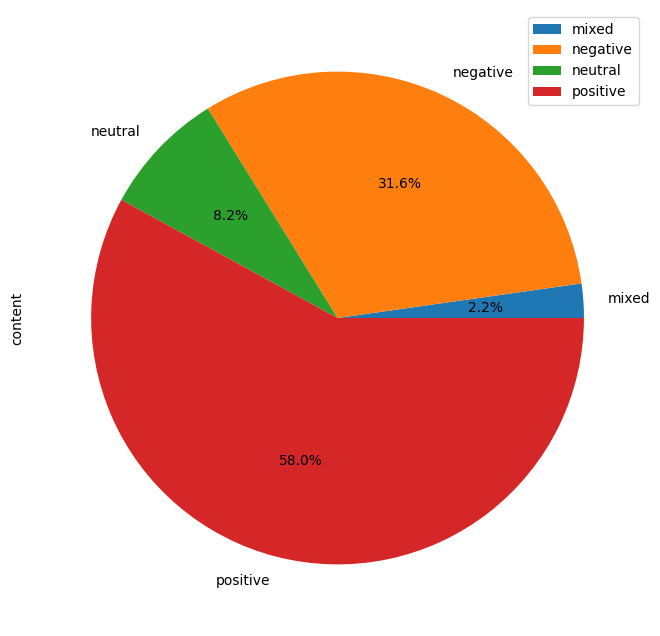

In [ ]:
# Visualize review content sentiment as pie chart.
reviews_content_sentiment.groupby(['sentiment']).count().plot(kind='pie', y='content', figsize=(8,8), autopct='%1.1f%%')

In [ ]:
# Group by sentiment & reviews_score
reviews_content_sentiment.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
mixed      1                 137
           2                  10
           3                   2
           4                   4
           5                  44
negative   1                2520
           2                  84
           3                  45
           4                  27
           5                 101
neutral    1                 411
           2                  24
           3                  19
           4                  39
           5                 229
positive   1                 246
           2                  32
           3                  50
           4                 283
           5                4485
Name: content, dtype: int64

<Axes: xlabel='sentiment'>

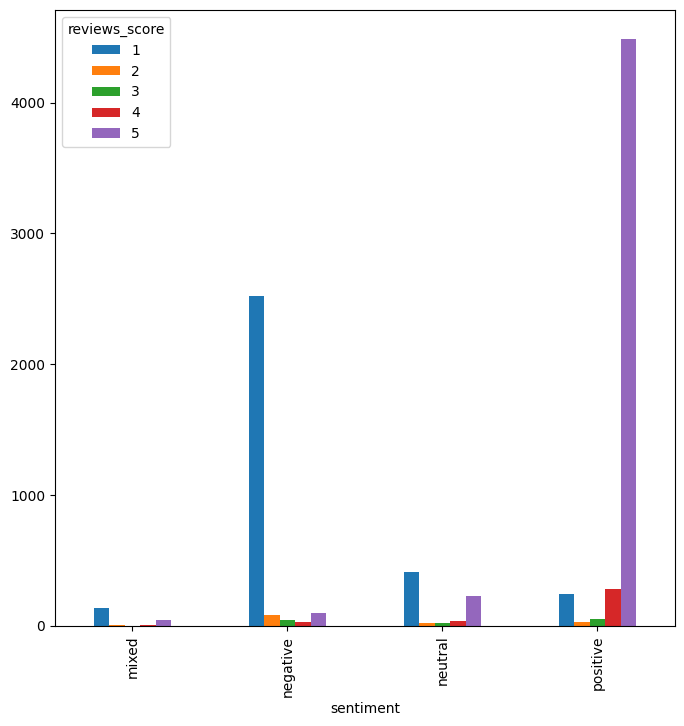

In [ ]:
# Visual sentiment & reviews_score as bar chart
pd.crosstab(reviews_content_sentiment['sentiment'],reviews_content_sentiment['reviews_score']).plot.bar(figsize=(8,8))

In [ ]:
# Check dataframe information
reviews_content_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8792 entries, 0 to 8791
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        8792 non-null   object
 1   sentiment      8792 non-null   object
 2   reviews_score  8792 non-null   object
dtypes: object(3)
memory usage: 206.2+ KB


In [ ]:
reviews_content_sentiment.to_csv('lendenclubborrower.csv')
reviews_content_sentiment.head()

,content,sentiment,reviews_score
0,Waste of time,negative,1
1,It's fakes app 199 pay but not approves loan,negative,1
2,Very bad experience from lendenclub ...my loan...,negative,1
3,"Kudos team instamoney for such an ideal work ,...",positive,5
4,I am pancard already registered pls help,positive,5


In [ ]:
# Create new dataframe to perform factorization
reviews_content_sentiment_factorized = reviews_content_sentiment.copy()

In [ ]:
# Perform factorization for sentiment column
reviews_content_sentiment_factorized.sentiment = pd.factorize(reviews_content_sentiment_factorized.sentiment)[0]

In [ ]:
# Convert reviews_score column data type to intager
reviews_content_sentiment_factorized['reviews_score'] = reviews_content_sentiment_factorized['reviews_score'].astype(int)

In [ ]:
# Check dataframe information
reviews_content_sentiment_factorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8792 entries, 0 to 8791
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   content        8792 non-null   object
 1   sentiment      8792 non-null   int64 
 2   reviews_score  8792 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 206.2+ KB


In [ ]:
# Group by sentiment (factorized) & reviews_score
reviews_content_sentiment_factorized.groupby(["sentiment", "reviews_score"])["content"].count()

sentiment  reviews_score
0          1                2520
           2                  84
           3                  45
           4                  27
           5                 101
1          1                 246
           2                  32
           3                  50
           4                 283
           5                4485
2          1                 411
           2                  24
           3                  19
           4                  39
           5                 229
3          1                 137
           2                  10
           3                   2
           4                   4
           5                  44
Name: content, dtype: int64

After factorization of sentiment column, below is numberic values the mapping.

0 = Neutral
1 = Negative
2 = Positive
3 = Mixed

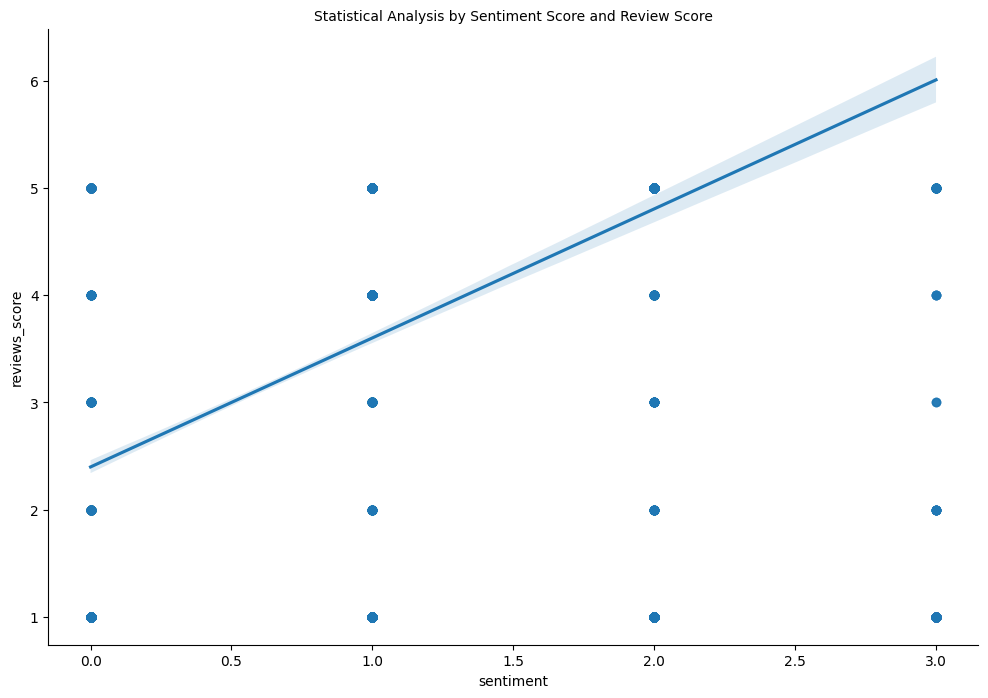

In [ ]:
# Plotting sentiment & reviews_score columns relationship by Seaborn.
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
plt.title('Statistical Analysis by Sentiment Score and Review Score', fontsize=10)
sns.regplot(x='sentiment', y= 'reviews_score', data=reviews_content_sentiment_factorized)
sns.despine()

Data Analysis from Visualization

Positive sentiment (2) from review content is trending to higher reivew score.

Negative sentiment (1) from review content is trending to lower review score.

Neutral sentiment (0) from review content is trending to lower review score.

In other word, lower review score is trending to Neutral sentiment (0).

From this observation, if sentiment is negative to neutral, user would give lower review score.